In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/S02-hw-dataset.csv", delimiter=",")
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [3]:
df.info()
"""
user_id - ID пользователя
age - возраст (почему-то float)
country - код страны
purchases - кол-во покупок
revenue - общая стоимость
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


'\nuser_id - ID пользователя\nage - возраст (почему-то float)\ncountry - код страны\npurchases - кол-во покупок\nrevenue - общая стоимость\n'

In [4]:
df.loc[:,"age":].describe()
# user_id нам не имеет смысла здесь считать - он порядковый
# сразу видно, что есть отрицательная покупка + настарожил 5 и 120 летний покупатель

,age,purchases,revenue
count,39.000000,41.000000,41.000000
mean,36.512821,4.829268,820.048780
std,18.304259,2.710189,613.127269
min,5.000000,-1.000000,0.000000
25%,24.000000,3.000000,432.000000
50%,33.000000,5.000000,693.000000
75%,45.500000,7.000000,1115.000000
max,120.000000,11.000000,2475.000000


In [5]:
df.isna().sum() # видим - 2 пропуска в возрасте

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [6]:
df["age"].isna().mean() # т.е. 4 процента от всего столбца

np.float64(0.04878048780487805)

In [7]:
df.duplicated().sum() # есть 1 дубликат строки

np.int64(1)

In [8]:
df[df.duplicated()] # а именно последняя строка

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [9]:
df = df[~df.duplicated()] # убираем дубликат

In [10]:
df = df[~df["age"].isna()] # убираем NaN

In [11]:
df = df[df["purchases"] >= 0] # убираем отрицательные покупки

In [12]:
df = df[~((df["purchases"] > 0) & (df["revenue"] == 0))] # убираем, где стоимости нет, а покупки есть 

In [13]:
df = df[(df["age"] >= 10) & (df["age"] <= 80)] # ставим адекватный возраст

In [14]:
df.loc[:,"age":].describe() # статистика значительно улучшилась

,age,purchases,revenue
count,35.000000,35.000000,35.000000
mean,35.742857,4.714286,826.057143
std,11.420680,2.573295,631.471481
min,18.000000,0.000000,0.000000
25%,25.500000,3.000000,418.000000
50%,34.000000,5.000000,693.000000
75%,45.500000,6.500000,1109.500000
max,57.000000,11.000000,2475.000000


В ходе работы с даными были выявлены пропуски, дубликаты, логические ошибки и серьёзные выбросы. Все они убраны из датафрейма, чтобы не портить дальнейший EDA и визуализации

In [15]:
df["country"].value_counts() # смотрим кол-во стран

country
FR    11
RU    11
US     6
DE     5
CN     2
Name: count, dtype: int64

In [16]:
df_by_countries = df.groupby("country") # группированный датафрейм по странам

In [17]:
df_by_countries.agg({
    "purchases": ["min", "max", "sum", "std", "mean", "median"],
    "revenue": ["min", "max", "sum", "std", "mean", "median"]
})


purchases                                    revenue              \
              min max sum       std      mean median     min   max   sum   
country                                                                    
CN              2   7   9  3.535534  4.500000    4.5     456  1652  2108   
DE              3  11  33  3.361547  6.600000    6.0     702  2475  7377   
FR              0   7  52  2.686667  4.727273    6.0       0  1608  7326   
RU              0   7  47  2.611165  4.272727    5.0       0  2086  8272   
US              3   5  24  0.894427  4.000000    4.0     330   980  3829   

                                          
                std         mean  median  
country                                   
CN       845.699710  1054.000000  1054.0  
DE       874.360795  1475.400000  1104.0  
FR       533.463026   666.000000   546.0  
RU       610.655877   752.000000   650.0  
US       297.841848   638.166667   636.5

- Германия - лидер по числу покупок и выручке
- Китай - покупок на пользователя меньше, но выручка тоже хорошая
- Россия - средние показатели, но между ними большой разброс
- Франция - покупок много, но выручка мала
- США - малеьнкий разброс, выручка тоже мала

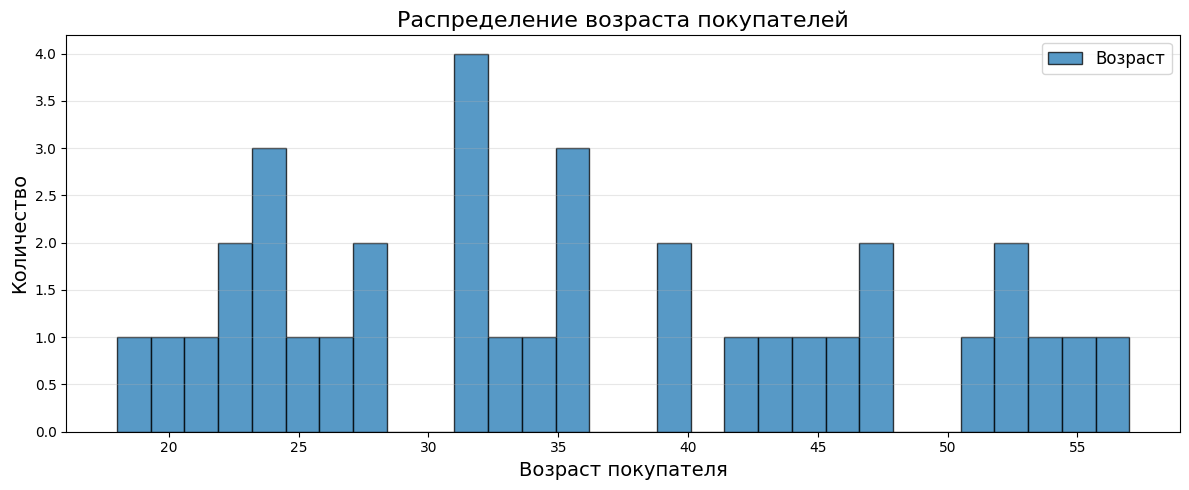

In [18]:
plt.figure(figsize=(12, 5))

plt.hist(
    df["age"],
    bins=30,
    edgecolor="black",
    alpha=0.75    
)

plt.xlabel("Возраст покупателя", fontsize=14)
plt.ylabel("Количество", fontsize=14)
plt.title("Распределение возраста покупателей", fontsize=16)

plt.grid(axis="y", alpha=0.3)
plt.legend(["Возраст"], fontsize=12)
plt.savefig("figures/hist_age.png", dpi=300)

plt.tight_layout()

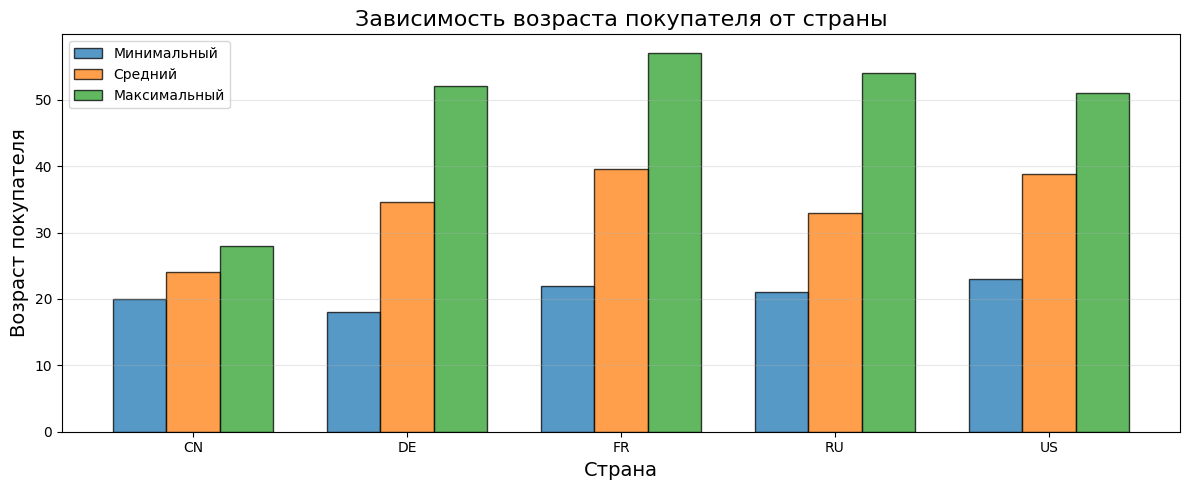

In [19]:
stats = df.groupby("country")["age"].agg(["min", "mean", "max"])

countries = stats.index
x = np.arange(len(countries))
width = 0.25      

plt.figure(figsize=(12, 5))
plt.bar(x - width, stats["min"],  width, label="Минимальный", edgecolor="black", alpha=0.75)
plt.bar(x, stats["mean"], width, label="Средний", edgecolor="black", alpha=0.75)
plt.bar(x + width, stats["max"],  width, label="Максимальный", edgecolor="black", alpha=0.75)

plt.xticks(x, countries)
plt.xlabel("Страна", fontsize=14)
plt.ylabel("Возраст покупателя", fontsize=14)
plt.title("Зависимость возраста покупателя от страны", fontsize=16)
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("figures/bar_age_by_countries.png", dpi=300)

# В Китае самая молодая аудитория, во Франции - самая старая

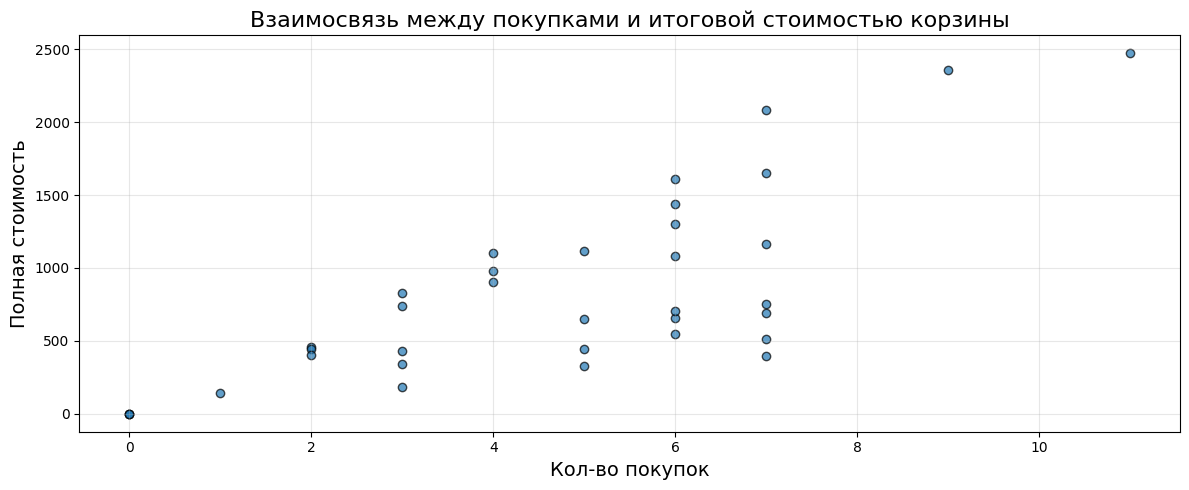

In [20]:
plt.figure(figsize=(12, 5))
plt.scatter(df["purchases"], df["revenue"], alpha=0.7, edgecolor="black")

plt.title("Взаимосвязь между покупками и итоговой стоимостью корзины", fontsize=16)
plt.xlabel("Кол-во покупок", fontsize=14)
plt.ylabel("Полная стоимость", fontsize=14)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/scatter_relationship_between_purchases_and_revenue.png", dpi=300)

# Практически линейная зависимость

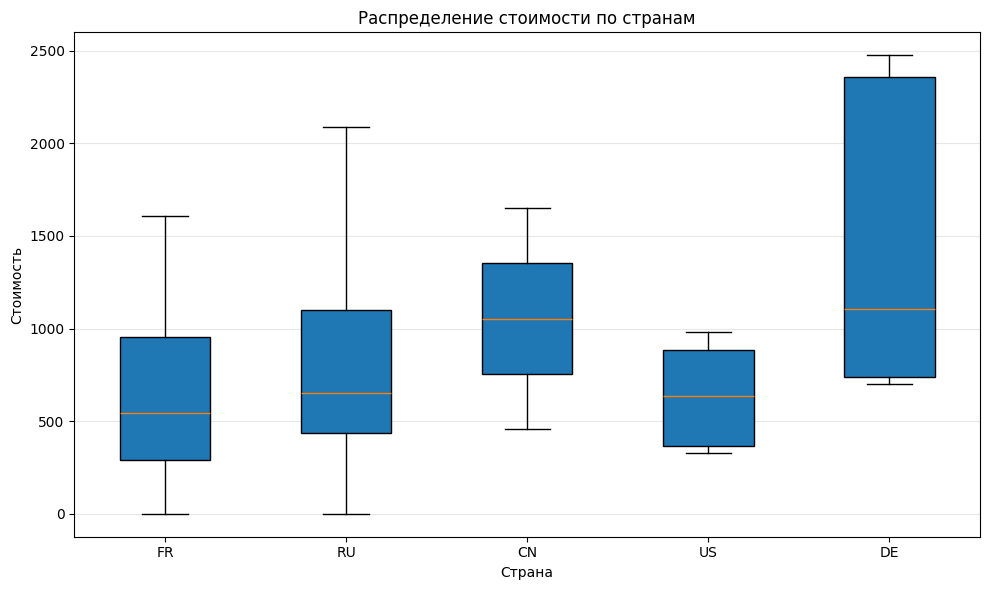

In [21]:
plt.figure(figsize=(10, 6))

plt.boxplot(
    [df[df["country"] == c]["revenue"] for c in df["country"].unique()],
    tick_labels=df["country"].unique(),
    patch_artist=True
)

plt.title("Распределение стоимости по странам")
plt.xlabel("Страна")
plt.ylabel("Стоимость")

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("figures/boxplot_revenue_by_countries.png", dpi=300)

# Немцы дейстивтельно хорошо платят, а у американцев правда самый маленький разброс